***AirBnb Data Analysis***

## **Library and Data Loading**

In [1]:
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations and array handlin
import matplotlib.pyplot as plt  # Library for basic plotting
import seaborn as sns  # Library for advanced statistical visualization

In [2]:
from google.colab import drive  # Import the 'drive' module from Google Colab tools

drive.mount('/content/drive')  # Mount your Google Drive to access files

filepath = "/content/drive/MyDrive/Airbnb.csv"  # Specify the path to your CSV file

airbnb_data = pd.read_csv(filepath)  # Read the CSV and store the data in a DataFrame

Mounted at /content/drive


# **Data Summnary**

In [3]:
#Prints a list of all the column names (features) in your Airbnb dataset.
print(airbnb_data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [4]:
#Displays the first 5 rows of your DataFrame.
airbnb_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Display the last 5 rows of the DataFrame
airbnb_data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
#Counts the number of non-null (non-missing) values in each column
airbnb_data.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [7]:
# Get the data types of each column
print("Data types of each column:")
print(airbnb_data.dtypes)

Data types of each column:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


# **DATA CLEANING**

In [8]:
# Drop rows with missing values
airbnb_data = airbnb_data.dropna().copy()

# Convert data types
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'].copy())

In [9]:
# Re-Count the number of elements in each column after dropping null values
airbnb_data.count()

id                                38821
name                              38821
host_id                           38821
host_name                         38821
neighbourhood_group               38821
neighbourhood                     38821
latitude                          38821
longitude                         38821
room_type                         38821
price                             38821
minimum_nights                    38821
number_of_reviews                 38821
last_review                       38821
reviews_per_month                 38821
calculated_host_listings_count    38821
availability_365                  38821
dtype: int64

# **Data Visualization**

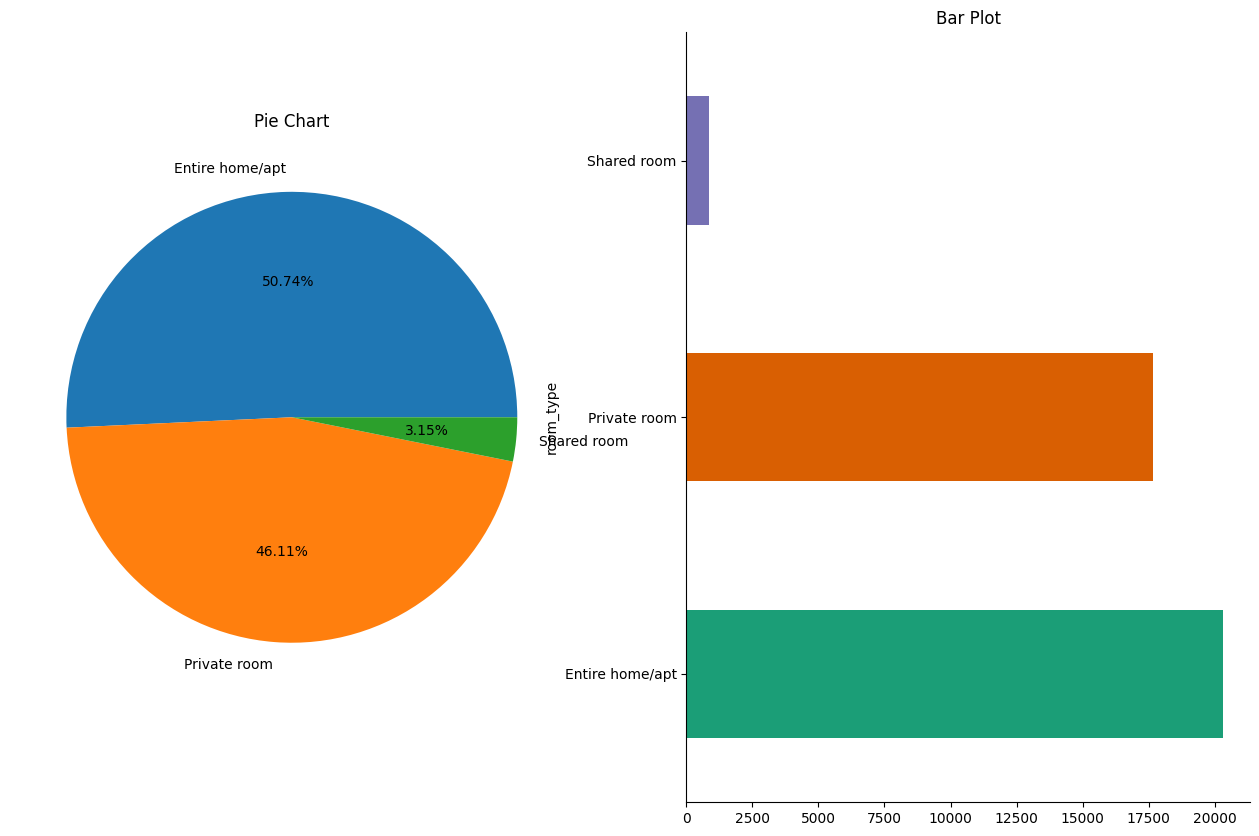

In [19]:
#@title Airbnb Availability by Room Type(Pie Chart & Bar Plot)
# Calculate the total availability for each room type
total_availability_by_room_type = airbnb_data.groupby('room_type')['availability_365'].sum()

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,10))

# Plot the pie chart
ax1.pie(total_availability_by_room_type.values, labels=total_availability_by_room_type.index, autopct='%1.2f%%')


# Plot the bar chart
airbnb_data.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax2)

ax2.spines[['top', 'right']].set_visible(False)

# Show the combined plot
ax1.set_title('Pie Chart')
ax2.set_title('Bar Plot')
plt.show()

The pie chart shows that Entire **home/apt rentals have the highest availability (75.37%)**, followed by Private rooms (20.67%) and Shared rooms (3.96%).
   - The bar plot confirms this distribution, with Entire **home/apt rentals** having the highest number of available rooms.


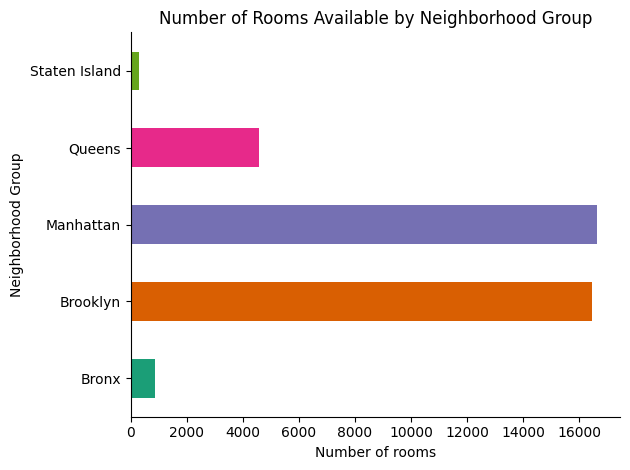

In [11]:
# @title Number of Rooms Available by Neighborhood Group
airbnb_data.groupby('neighbourhood_group').size().plot(kind='barh',
                                                       color=sns.color_palette('Dark2'))

plt.xlabel('Number of rooms')  # Set x-axis label
plt.ylabel('Neighborhood Group')
plt.title('Number of Rooms Available by Neighborhood Group')  # Add a title

plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**Manhattan** has the highest availability of Airbnb rooms, making it a popular destination for tourists and travelers.
- The distribution of room availability across neighborhood groups provides valuable insights into the popularity and demand for Airbnb rentals in different parts of the city.

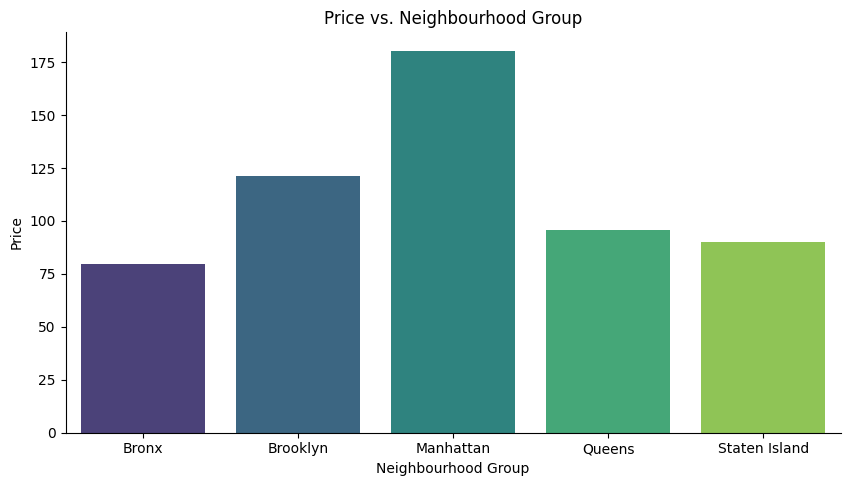

In [12]:
# @title Price vs. Neighbourhood Group

# Assuming 'airbnb_data' is a DataFrame with the necessary data,
# and 'neighbourhood_group' and 'price' are columns in this DataFrame.

# Create a bar plot
plt.figure(figsize=(10, 5.2))

# Calculate average prices for each neighbourhood group and restructure as a regular DataFrame.
grouped_data = airbnb_data.groupby('neighbourhood_group')['price'].mean().reset_index()

# Create a bar plot showing average price per neighbourhood group, with color-coding based on the group.
sns.barplot(data=grouped_data, x='neighbourhood_group', y='price', hue='neighbourhood_group', palette='viridis')#, legend=False)

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Price vs. Neighbourhood Group')

# Despine the plot for a cleaner look
sns.despine()

# Show the plot
plt.show()

 The bar plot shows that the average price of Airbnb rentals varies across neighborhood groups.
   - **Manhattan** has the highest average price, followed by Brooklyn, Queens, and Staten Island.
   - This information can be useful for travelers looking for affordable Airbnb rentals or hosts looking to optimize their pricing strategy.

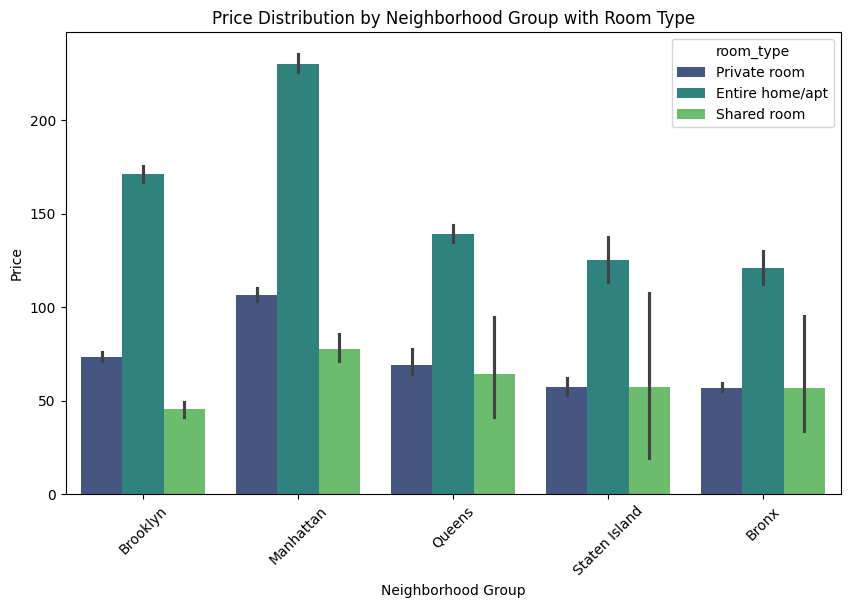

<Figure size 640x480 with 0 Axes>

In [13]:
# @title Bar chart showing price distribution by neighborhood group with room type as hue
# Create a bar chart showing price distribution by neighborhood group with room type as hue
plt.figure(figsize=(10, 6))
sns.barplot(data=airbnb_data, x='neighbourhood_group', y='price', hue='room_type', palette='viridis')

# Add labels and title
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood Group with Room Type')

# Rotate x-axis labels for better readability if many groups
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()
plt.show()

The price distribution of Airbnb rentals varies by both neighborhood group and room type.
 Entire **home/apt rentals** tend to be more expensive than private rooms, which are in turn more expensive than shared rooms in all Neighborhood Group

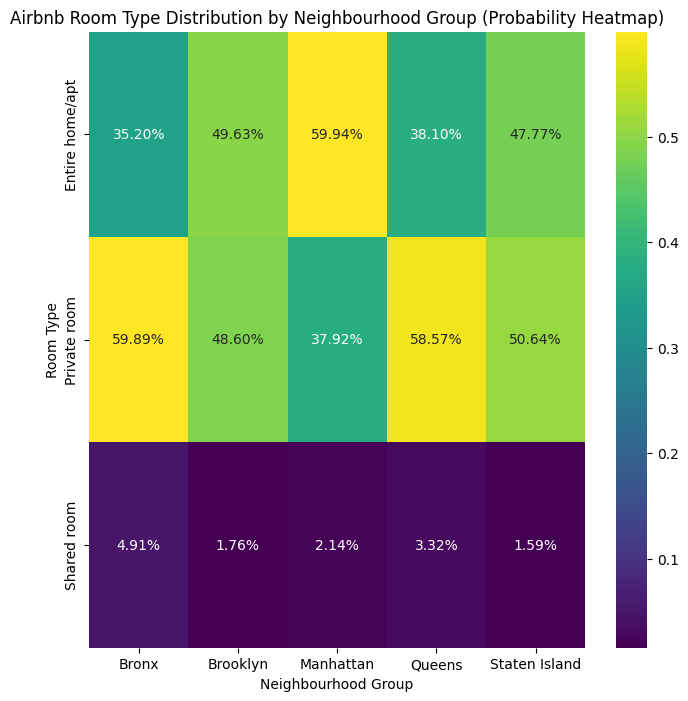

In [14]:
# @title Airbnb Room Type Distribution by Neighbourhood Group (Probability Heatmap)
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['room_type'].value_counts(normalize=True)  # Calculate probabilities
    for x_label, grp in airbnb_data.groupby('neighbourhood_group')
})
#Create a heatmap with probability values in the cells
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt=".2%", cbar=True)  # Add annotations with percentage format

plt.title('Airbnb Room Type Distribution by Neighbourhood Group (Probability Heatmap)')
plt.xlabel('Neighbourhood Group')
_ = plt.ylabel('Room Type')


The distribution of room types varies across neighborhood groups. Entire **home/apt rentals are more common in Manhattan and Brooklyn,** while **private rooms are more common in Queens and Staten Island**.

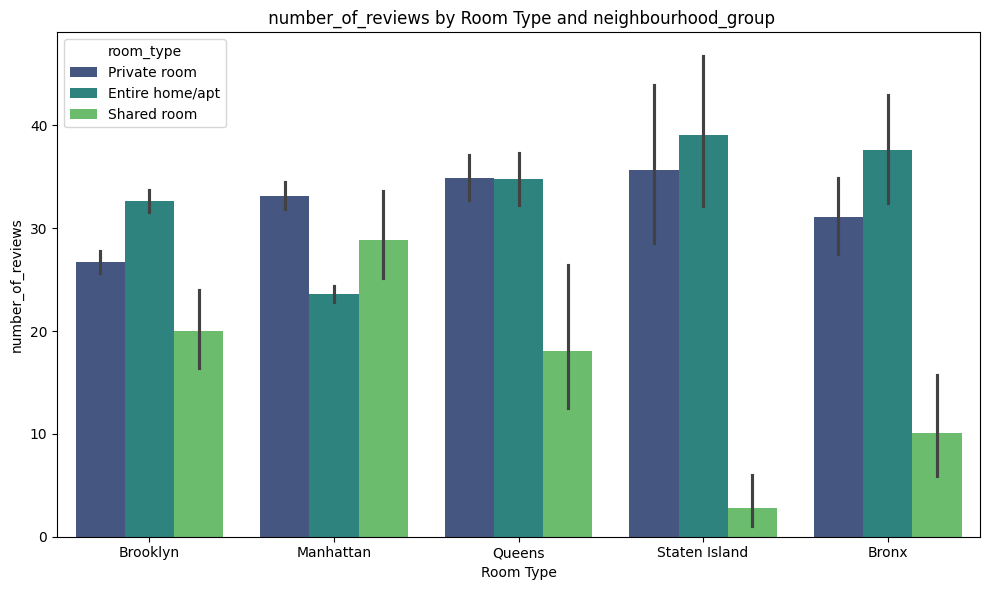

In [15]:
# @title Airbnb Number_Of_Reviews by Room Type and Neighbourhood_group

plt.figure(figsize=(10, 6))
sns.barplot(data=airbnb_data,
            x='neighbourhood_group',
            y='number_of_reviews',
            hue='room_type',
            palette='viridis')

plt.xlabel('Room Type')
plt.ylabel('number_of_reviews')
plt.title(' number_of_reviews by Room Type and neighbourhood_group')
plt.tight_layout()
plt.show()


The number of reviews for Airbnb rentals varies by both neighborhood group and room type, with **Entire home/apt rentals** having the highest number of reviews followed by Private rooms and Shared rooms.

# **Outcome from this Airbnb Data Analysis Using EDA**

Airbnb availability varies across room types, with Entire ***home/apt rentals*** having the highest availability followed by Private rooms and Shared rooms.
* ***Manhattan*** has the highest availability of Airbnb rooms, making it a popular destination for tourists and travelers.

* The average price of Airbnb rentals varies across neighborhood groups, with ***Manhattan having the highest average price*** followed by Brooklyn, Queens, and Staten Island.

* The price distribution of Airbnb rentals varies by both neighborhood group and room type, with **Entire home/apt rentals** being more expensive than private rooms, which are in turn more expensive than shared rooms.

* The distribution of room types varies across neighborhood groups, with Entire home/apt rentals being more common in **Manhattan and Brookly**n, while private rooms are more common in Queens and Staten Island.

* The number of reviews for Airbnb rentals varies by both ***neighborhood group and room type, with Entire home/apt rentals having the highest number of reviews*** followed by Private rooms and Shared rooms.